### Logistic Regression

In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn import datasets

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# from tensorflow.python.framework import ops
# ops.reset_default_graph()

sess = tf.Session()

In [22]:
birthdata_path = '../data/lowbwt.dat'
with open(birthdata_path, 'r') as ff:
    lines = ff.readlines()
    
# len(lines)
birth_file = '\r\n'.join(lines)
# birth_file
birth_data = birth_file.split('\r\n')
# len(birth_data)
birth_header = [x for x in birth_data[0].split(' ') if len(x) >= 1]
# birth_header
birth_data = [[float(x) for x in y.split(' ') if len(x) >= 1] for y in birth_data[1:] if len(y) >= 1]
# birth_data

In [23]:
x_vals = np.array([x[2:9] for x in birth_data])
y_vals = np.array([x[1] for x in birth_data])

In [24]:
train_indices = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [25]:
# normalize nan value
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

In [26]:
batch_size = 25

x_data = tf.placeholder(shape=[None, 7], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[7, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

model_output = tf.add(tf.matmul(x_data, A), b)

In [27]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))

init = tf.global_variables_initializer()
sess.run(init)

my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)


In [28]:
prediction = tf.round(tf.sigmoid(model_output))
predictions_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)

accuracy = tf.reduce_mean(predictions_correct)

In [29]:
loss_vec = []
train_acc = []
test_acc = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    temp_acc_train = sess.run(accuracy, feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    train_acc.append(temp_acc_train)
    temp_acc_test = sess.run(accuracy, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_acc.append(temp_acc_test)

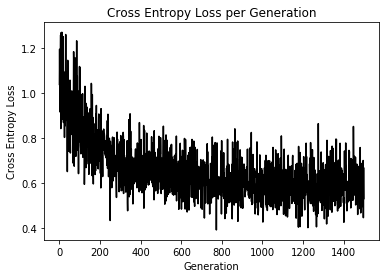

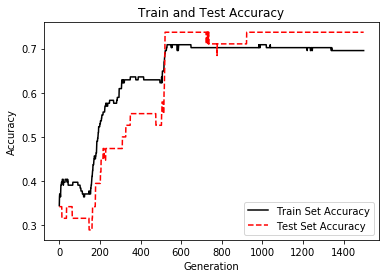

In [30]:
plt.plot(loss_vec, 'k-')
plt.title('Cross Entropy Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Cross Entropy Loss')
plt.show()

plt.plot(train_acc, 'k-', label='Train Set Accuracy')
plt.plot(test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()